In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

In [132]:
import pandas as pd

# Load each CSV file
df1 = pd.read_csv(r"C:\Users\Essienhk\Downloads\dim_farmer2.csv")
df2 = pd.read_csv(r"C:\Users\Essienhk\Downloads\dim_farm2.csv")
df3 = pd.read_csv(r"C:\Users\Essienhk\Downloads\dim_financial_history2.csv")

df = df1.merge(df2, on='Farmer_ID').merge(df3, on='Farmer_ID')

In [20]:
df

,Farmer_ID,First Name,Last Name,Phone Number,Age,Gender,State of Residence,Education_Level,Years_in_Farming,Has_Bank_Account,...,Proximity_to_Roads,Finance_ID,Loan_Purpose,Loan_Amount,Interest_Rate,Tenure_Months,Loan_Approval_Status,Repayment_Status,Credit Bureau Default_History,Source_of_Funding
0,FARMER_001,Zainab,Balogun,9060227680,32,Female,Jigawa,Primary,9,True,...,Close,LOAN_ce70a3,Fertilizer,177192,13.72,6,Rejected,NaN,False,Microfinance
1,FARMER_002,Ijeoma,Alabi,8180026577,21,Male,Ondo,NaN,10,True,...,Close,LOAN_209ac5,Land Expansion,279196,10.04,6,Approved,Fully Paid,True,NGO
2,FARMER_003,Femi,Ibe,8172580863,25,Female,Lagos,Tertiary,1,True,...,Far,LOAN_090d4f,Labor,255180,22.17,6,Approved,Defaulted,False,Microfinance
3,FARMER_004,Uchenna,Ibe,7062713332,33,Male,Katsina,Secondary,8,False,...,Close,LOAN_cc70cd,Labor,312780,9.19,6,Rejected,NaN,False,Bank
4,FARMER_005,Bayo,Umeh,8137593586,33,Female,Akwa Ibom,NaN,1,True,...,Close,LOAN_276710,Irrigation,312943,23.14,12,Approved,Fully Paid,True,Government
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,FARMER_2996,Musa,Ibrahim,8085667902,24,Male,Borno,NaN,6,False,...,Close,LOAN_bb4751,Fertilizer,417155,17.79,12,Approved,Partially Paid,True,NGO
2996,FARMER_2997,Ijeoma,Mohammed,9028513641,23,Female,Gombe,NaN,11,True,...,Far,LOAN_1eb6ce,Labor,403824,24.77,24,Approved,Fully Paid,False,Microfinance
2997,FARMER_2998,Ifeanyi,Nwosu,8079830893,25,Male,Ogun,NaN,13,False,...,Far,LOAN_b6511d,Land Expansion,407907,11.01,24,Approved,Fully Paid,False,Microfinance
2998,FARMER_2999,Oluchi,Yusuf,8063999271,30,Female,Kebbi,Secondary,5,True,...,Far,LOAN_f9ac56,Fertilizer,181023,9.01,18,Rejected,NaN,False,NGO


In [10]:
print(df.columns)

Index(['Farmer_ID', 'First Name', 'Last Name', 'Phone Number', 'Age', 'Gender',
       'State of Residence', 'Education_Level', 'Years_in_Farming',
       'Has_Bank_Account', 'Bank Account', 'Bank Name',
       'Digital_Literacy_Level', 'Cooperative_Member', 'Agribusiness_Training',
       'Farm_ID', 'Farm_Location', 'Farm_Size', 'Irrigation_Type', 'Crop_Type',
       'Has_IoT_Sensors', 'Soil_Quality', 'Access_to_Market', 'Pest_Incidence',
       'Weather_Anomalies', 'Proximity_to_Roads', 'Finance_ID', 'Loan_Purpose',
       'Loan_Amount', 'Interest_Rate', 'Tenure_Months', 'Loan_Approval_Status',
       'Repayment_Status', 'Credit Bureau Default_History',
       'Source_of_Funding'],
      dtype='object')


In [133]:
data = df.drop(['Farmer_ID', 'First Name', 'Last Name', 'Phone Number', 'State of Residence', 'Bank Account', 'Bank Name','Farm_ID', 'Farm_Location',  'Finance_ID'], axis=1)

In [36]:
data.columns

Index(['Age', 'Gender', 'Education_Level', 'Years_in_Farming',
       'Has_Bank_Account', 'Digital_Literacy_Level', 'Cooperative_Member',
       'Agribusiness_Training', 'Farm_Size', 'Irrigation_Type', 'Crop_Type',
       'Has_IoT_Sensors', 'Soil_Quality', 'Access_to_Market', 'Pest_Incidence',
       'Weather_Anomalies', 'Proximity_to_Roads', 'Loan_Purpose',
       'Loan_Amount', 'Interest_Rate', 'Tenure_Months', 'Loan_Approval_Status',
       'Repayment_Status', 'Credit Bureau Default_History',
       'Source_of_Funding'],
      dtype='object')

In [58]:
data

,Age,Gender,Education_Level,Years_in_Farming,Has_Bank_Account,Digital_Literacy_Level,Cooperative_Member,Agribusiness_Training,Farm_Size,Irrigation_Type,Crop_Type,Has_IoT_Sensors,Soil_Quality,Access_to_Market,Pest_Incidence,Weather_Anomalies,Proximity_to_Roads,Loan_Purpose,Loan_Amount,Interest_Rate,Tenure_Months,Loan_Approval_Status,Repayment_Status,Credit Bureau Default_History,Source_of_Funding
0,32,Female,Primary,9,True,Low,False,True,3.28,Manual,Crop Farming,True,Poor,Good,Low,Rare,Close,Fertilizer,177192,13.72,6,Rejected,NaN,False,Microfinance
1,21,Male,NaN,10,True,Medium,True,True,3.24,Manual,Mixed Farming,False,Poor,Poor,Low,Rare,Close,Land Expansion,279196,10.04,6,Approved,Fully Paid,True,NGO
2,25,Female,Tertiary,1,True,High,True,True,1.48,Sprinkler,Crop Farming,False,Poor,Good,Moderate,NaN,Far,Labor,255180,22.17,6,Approved,Defaulted,False,Microfinance
3,33,Male,Secondary,8,False,Low,True,True,1.14,Manual,Mixed Farming,False,Good,Poor,Low,Rare,Close,Labor,312780,9.19,6,Rejected,NaN,False,Bank
4,33,Female,NaN,1,True,High,True,True,4.19,Sprinkler,Livestock Farming,False,Fair,Poor,Low,Frequent,Close,Irrigation,312943,23.14,12,Approved,Fully Paid,True,Government
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,24,Male,NaN,6,False,High,True,False,4.00,Manual,Mixed Farming,False,Fair,Good,Moderate,NaN,Close,Fertilizer,417155,17.79,12,Approved,Partially Paid,True,NGO
2996,23,Female,NaN,11,True,Low,False,True,1.24,Drip,Livestock Farming,False,Good,Poor,High,Rare,Far,Labor,403824,24.77,24,Approved,Fully Paid,False,Microfinance
2997,25,Male,NaN,13,False,Low,False,False,2.36,Drip,Mixed Farming,False,Fair,Good,Low,Rare,Far,Land Expansion,407907,11.01,24,Approved,Fully Paid,False,Microfinance
2998,30,Female,Secondary,5,True,Medium,False,True,2.15,Sprinkler,Mixed Farming,False,Fair,Good,High,Frequent,Far,Fertilizer,181023,9.01,18,Rejected,NaN,False,NGO


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            3000 non-null   int64  
 1   Gender                         3000 non-null   object 
 2   Education_Level                2270 non-null   object 
 3   Years_in_Farming               3000 non-null   int64  
 4   Has_Bank_Account               3000 non-null   bool   
 5   Digital_Literacy_Level         3000 non-null   object 
 6   Cooperative_Member             3000 non-null   bool   
 7   Agribusiness_Training          3000 non-null   bool   
 8   Farm_Size                      3000 non-null   float64
 9   Irrigation_Type                2277 non-null   object 
 10  Crop_Type                      3000 non-null   object 
 11  Has_IoT_Sensors                3000 non-null   bool   
 12  Soil_Quality                   3000 non-null   o

In [65]:
# Numerical columns: only int and float
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical columns: everything else (object, bool, etc.)
cat_cols = data.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print(f'Categorical columns: {cat_cols}')
print(f'Numerical columns: {num_cols}')

Categorical columns: ['Gender', 'Education_Level', 'Has_Bank_Account', 'Digital_Literacy_Level', 'Cooperative_Member', 'Agribusiness_Training', 'Irrigation_Type', 'Crop_Type', 'Has_IoT_Sensors', 'Soil_Quality', 'Access_to_Market', 'Pest_Incidence', 'Weather_Anomalies', 'Proximity_to_Roads', 'Loan_Purpose', 'Loan_Approval_Status', 'Repayment_Status', 'Credit Bureau Default_History', 'Source_of_Funding']
Numerical columns: ['Age', 'Years_in_Farming', 'Farm_Size', 'Loan_Amount', 'Interest_Rate', 'Tenure_Months']


In [40]:
data['Gender'].value_counts()

Gender
Male      1556
Female    1444
Name: count, dtype: int64

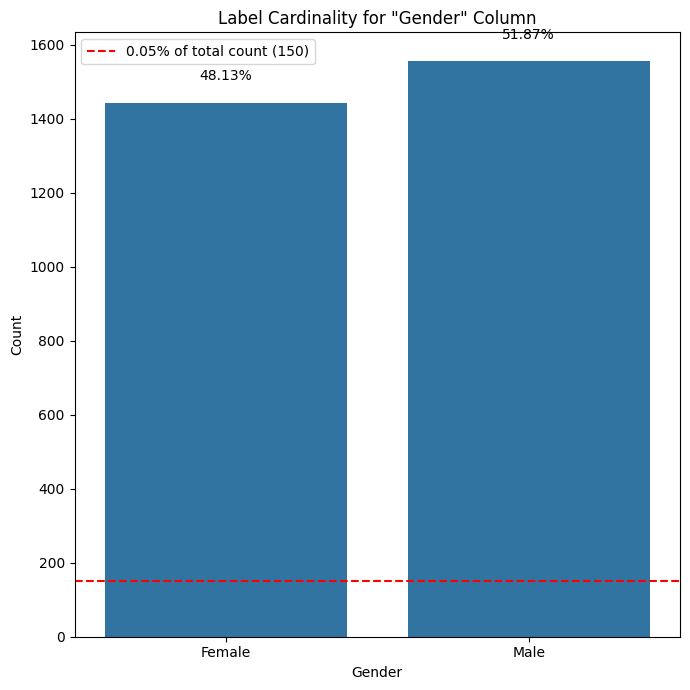

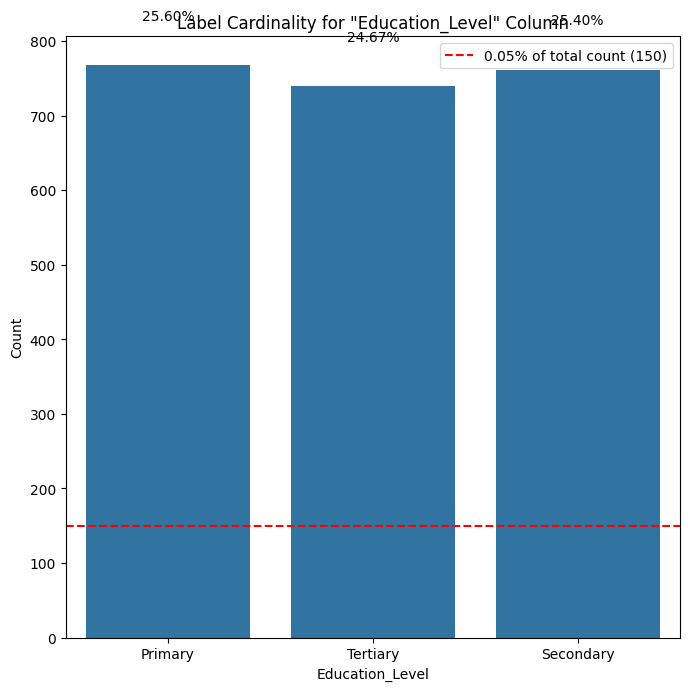

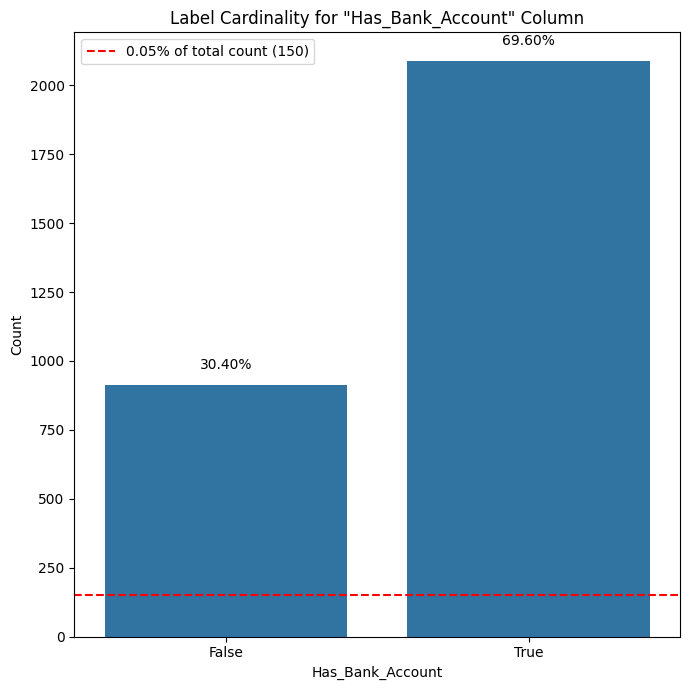

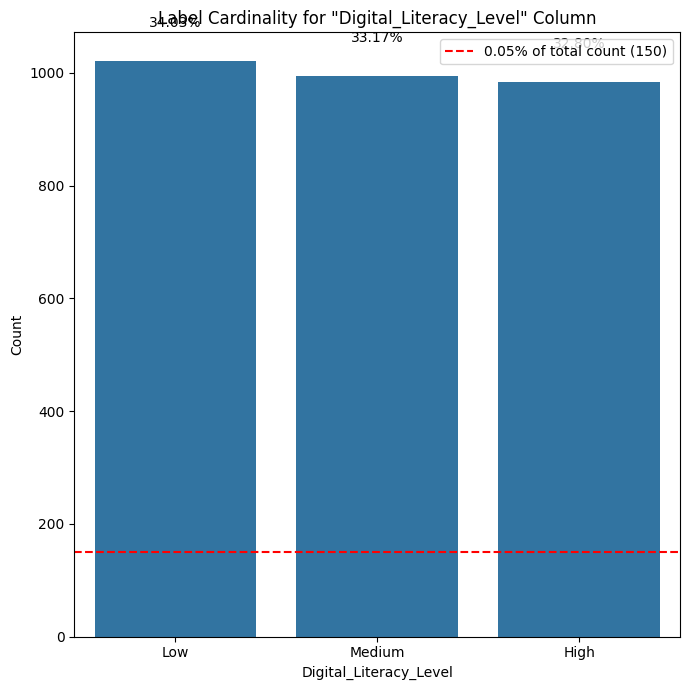

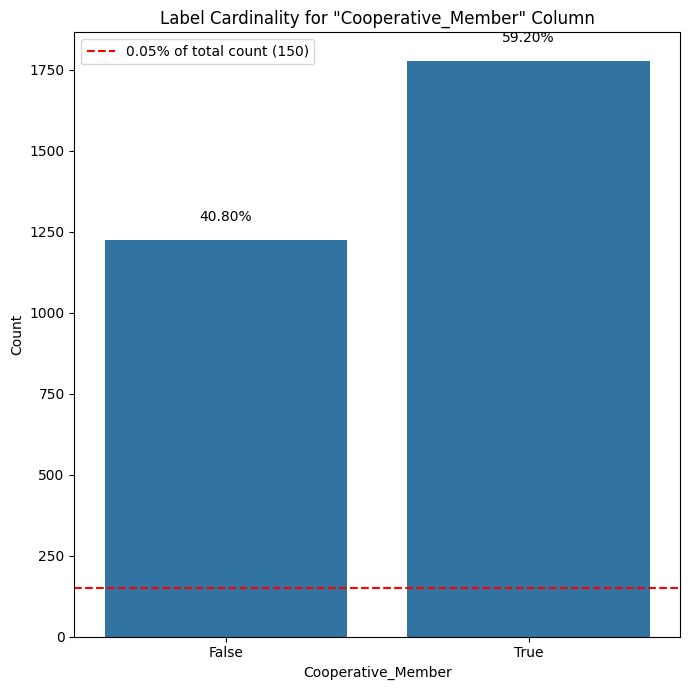

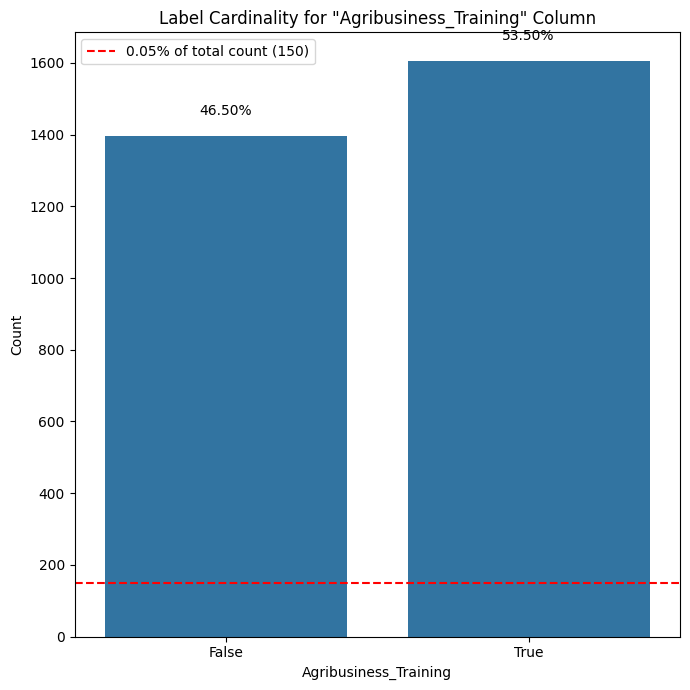

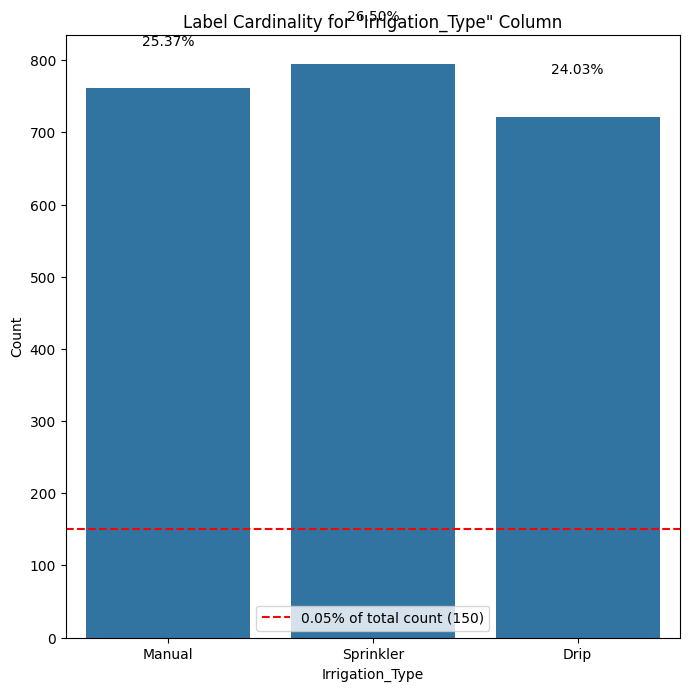

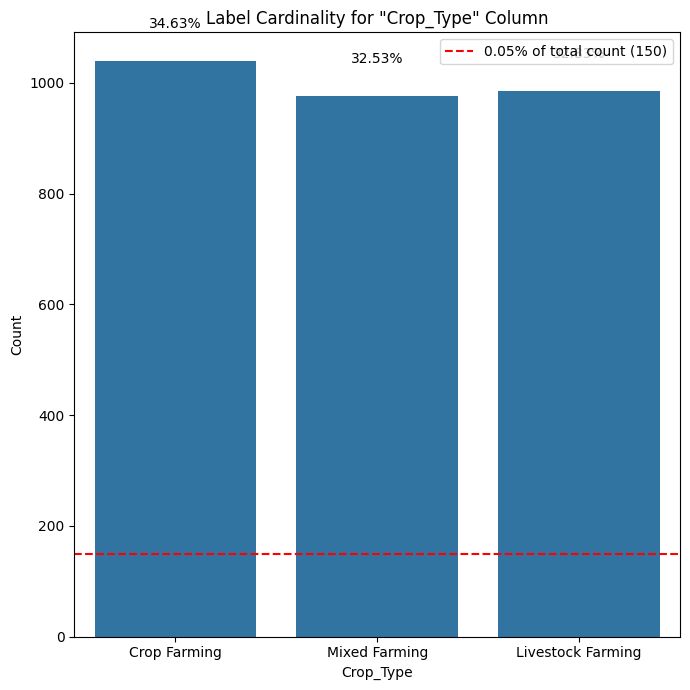

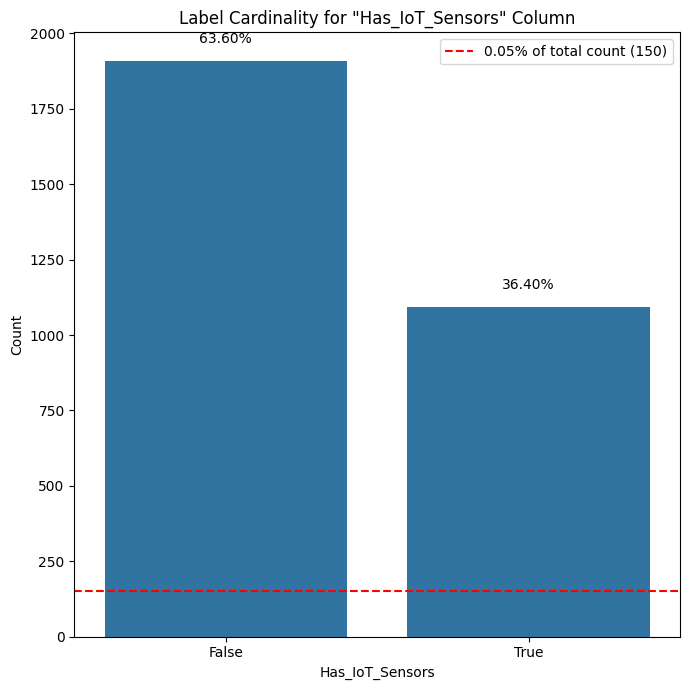

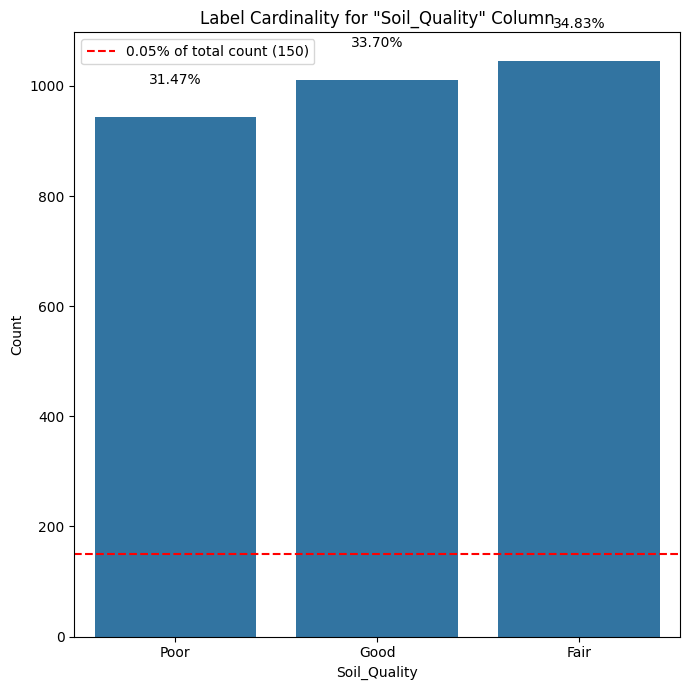

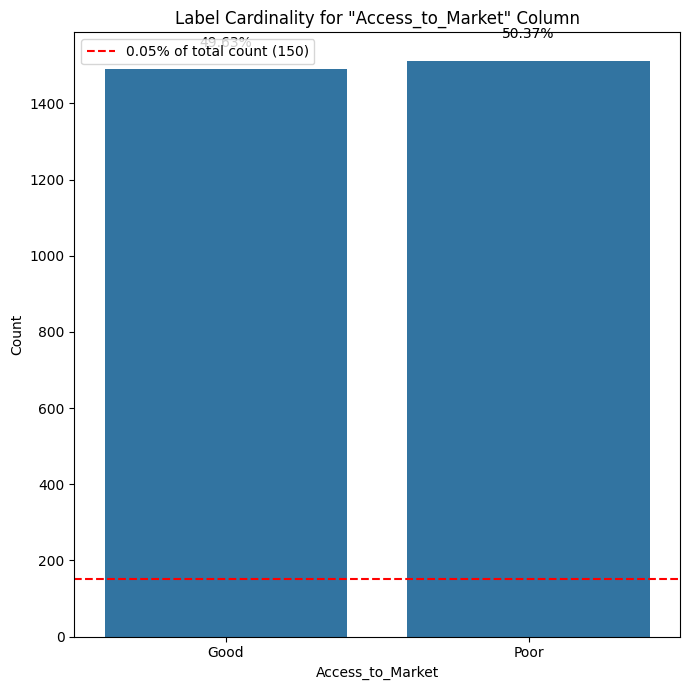

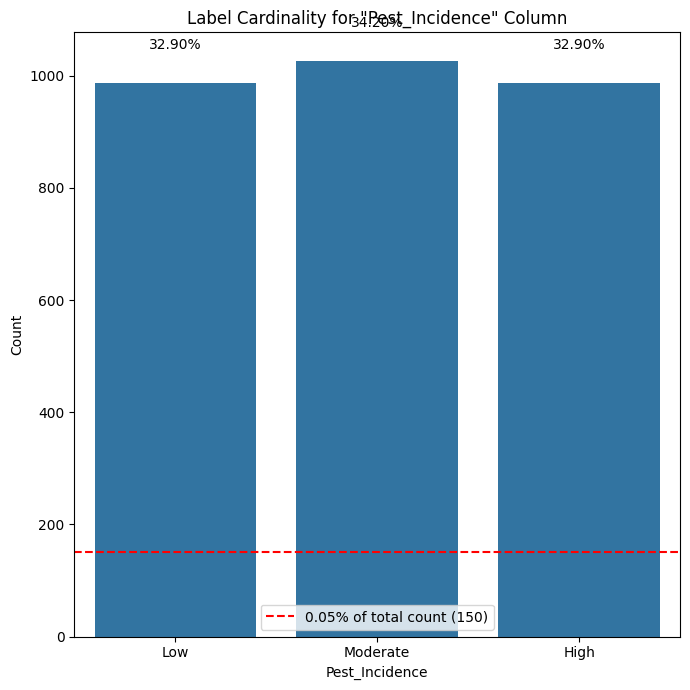

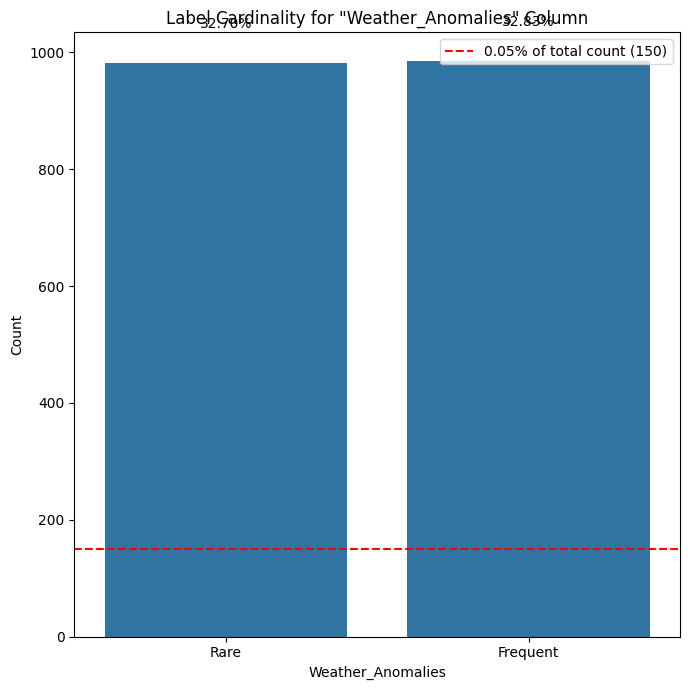

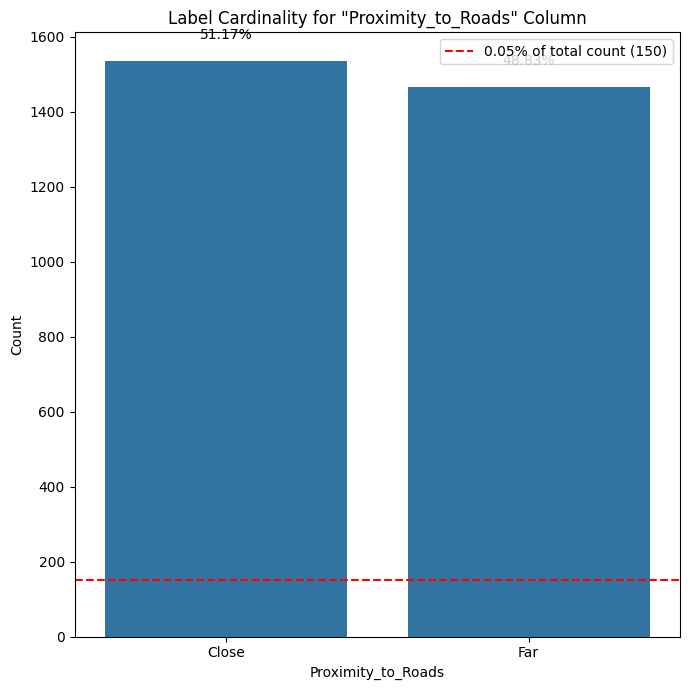

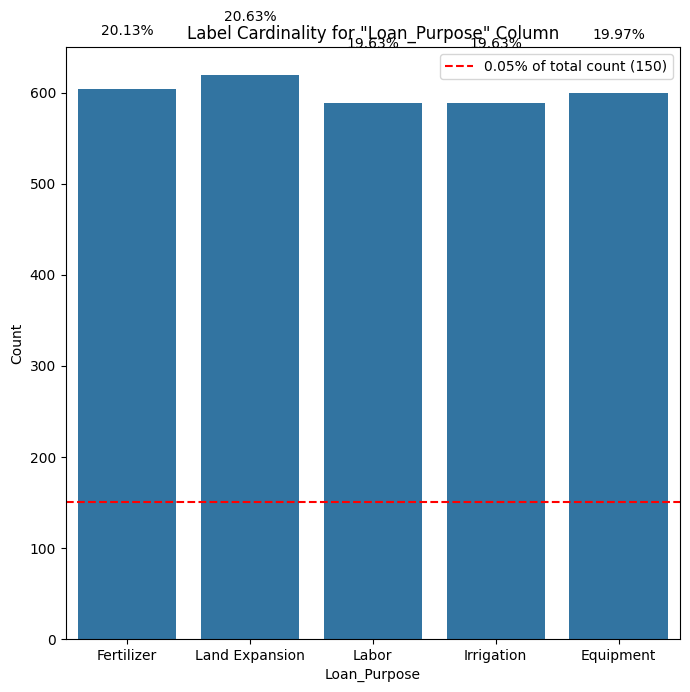

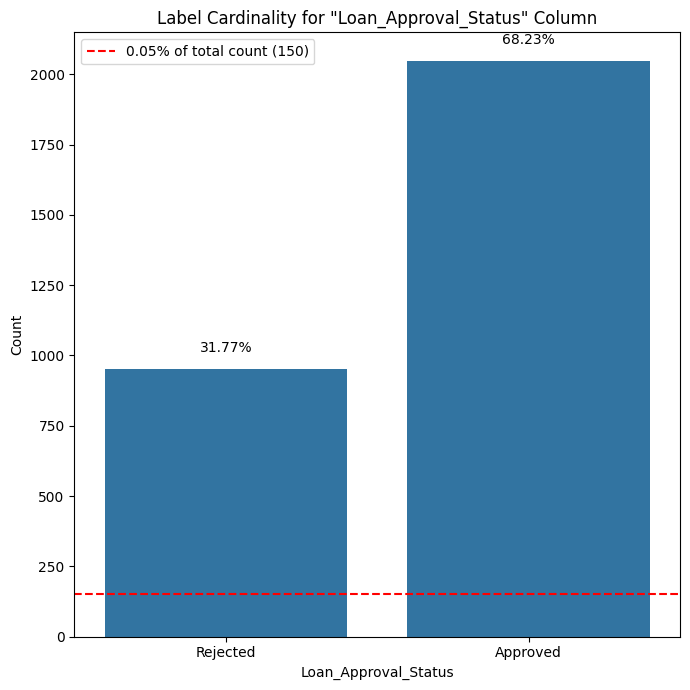

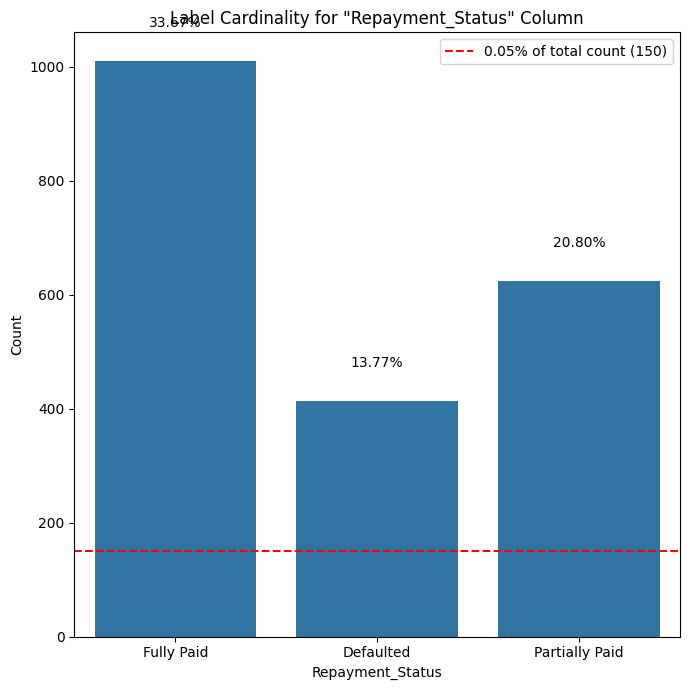

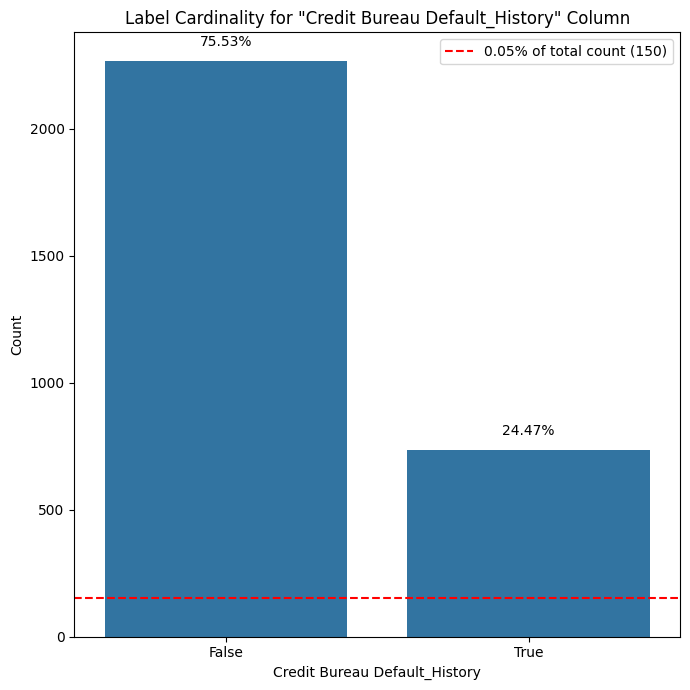

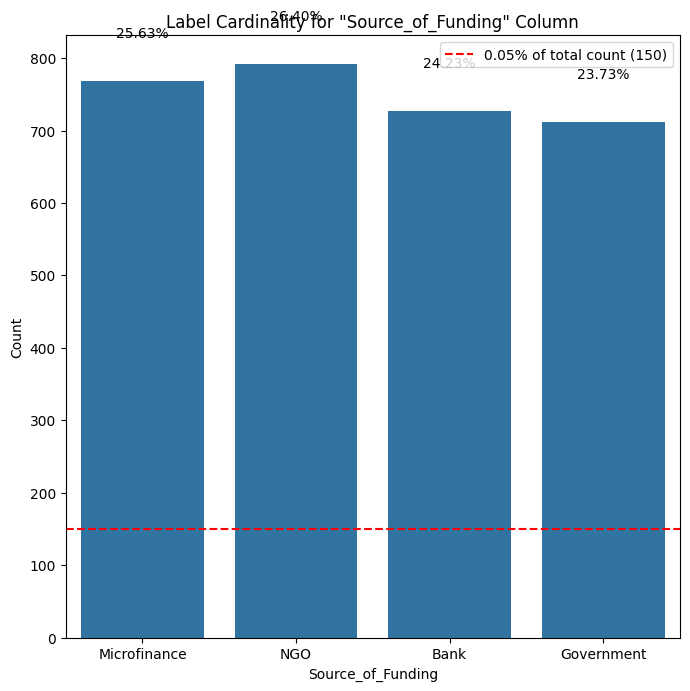

In [41]:
def plot_categorical_column(dataframe, column):

    plt.figure(figsize=(7, 7))
    ax = sns.countplot(x=dataframe[column])
    total_count = len(dataframe[column])
    threshold = 0.05 * total_count
    category_counts = dataframe[column].value_counts(normalize=True) * 100
    ax.axhline(threshold, color='red', linestyle='--', label=f'0.05% of total count ({threshold:.0f})')
    
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.text(p.get_x() + p.get_width() / 2., height + 0.02 * total_count, f'{percentage:.2f}%', ha="center")
    
    plt.title(f'Label Cardinality for "{column}" Column')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.tight_layout()
    
    plt.legend()
    plt.show()

for col in cat_cols:
    plot_categorical_column(data, col)

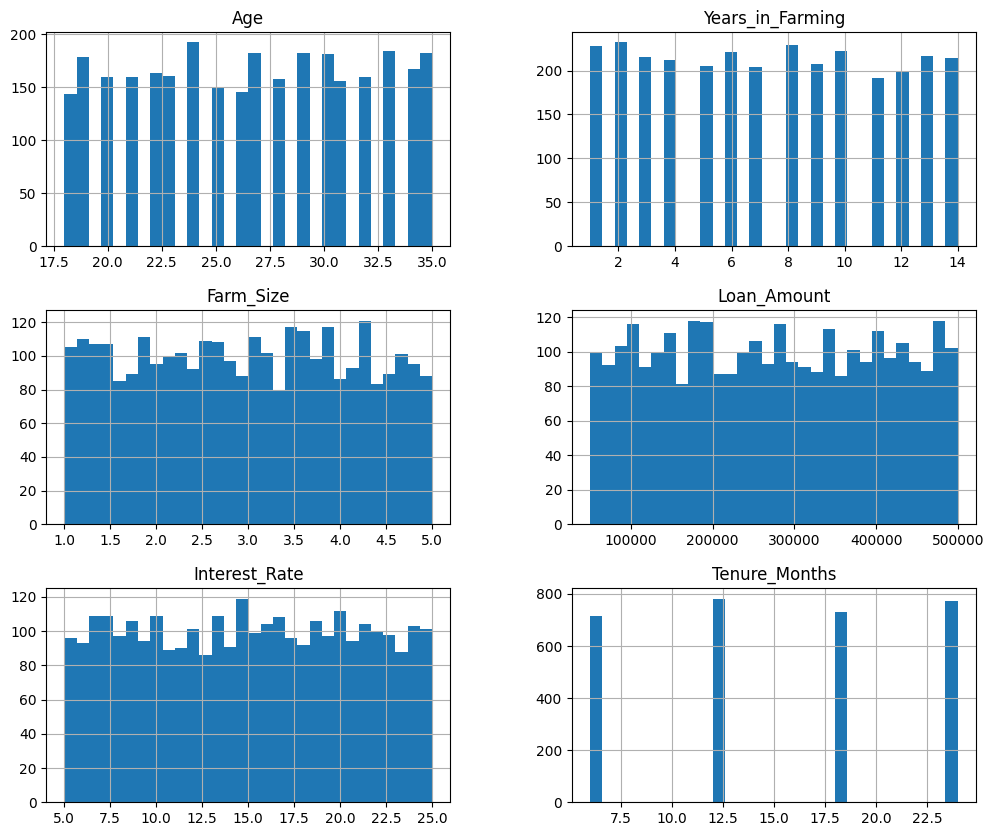

In [42]:
data[num_cols].hist(bins=30, figsize=(12,10))
plt.show()

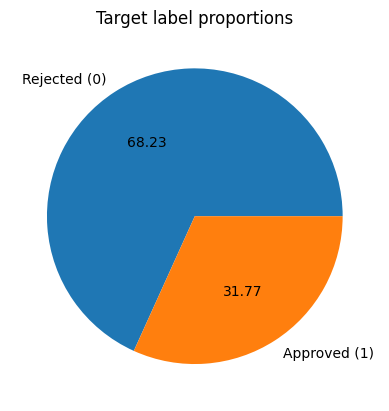

In [43]:
label_prop = df['Loan_Approval_Status'].value_counts()

plt.pie(label_prop.values, labels=['Rejected (0)', 'Approved (1)'], autopct='%.2f')
plt.title('Target label proportions')
plt.show()

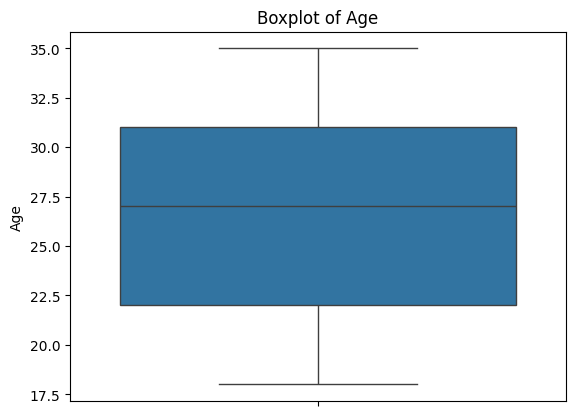

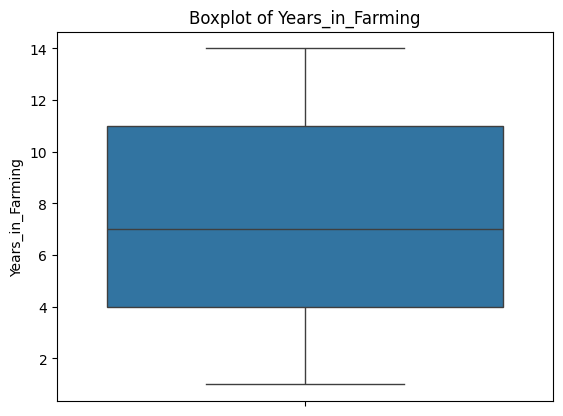

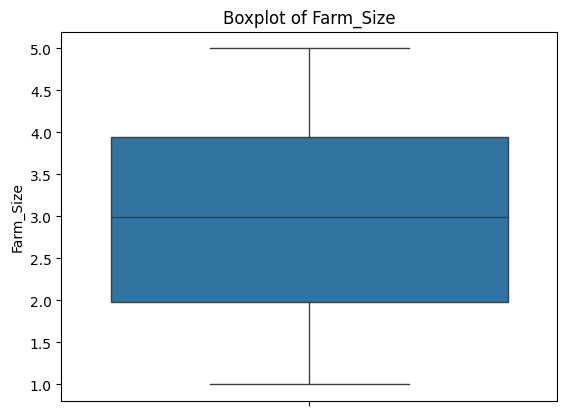

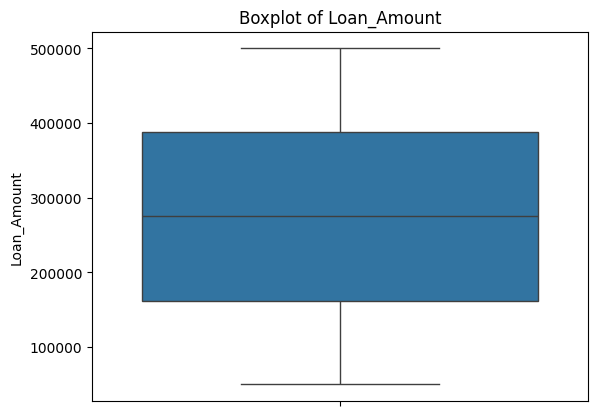

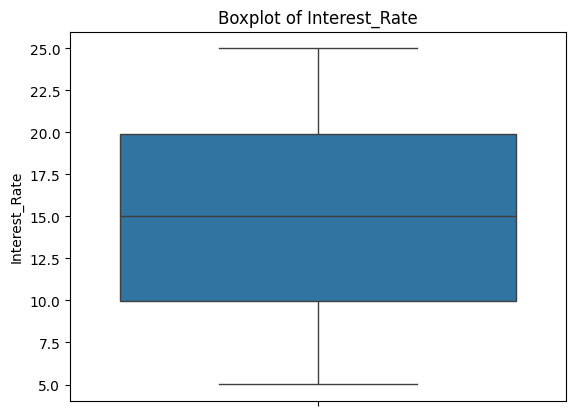

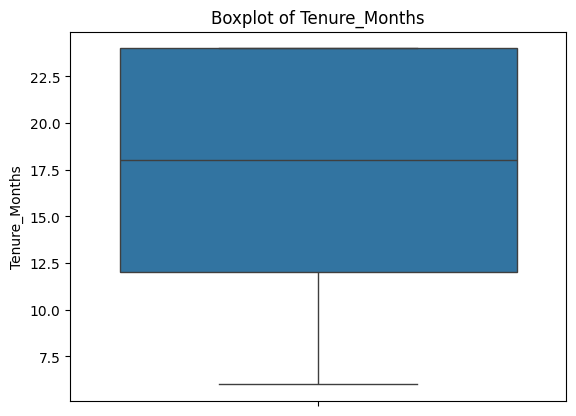

In [44]:
for col in num_cols:
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [59]:
print(data.isnull().sum())

Age                                 0
Gender                              0
Education_Level                   730
Years_in_Farming                    0
Has_Bank_Account                    0
Digital_Literacy_Level              0
Cooperative_Member                  0
Agribusiness_Training               0
Farm_Size                           0
Irrigation_Type                   723
Crop_Type                           0
Has_IoT_Sensors                     0
Soil_Quality                        0
Access_to_Market                    0
Pest_Incidence                      0
Weather_Anomalies                1034
Proximity_to_Roads                  0
Loan_Purpose                        0
Loan_Amount                         0
Interest_Rate                       0
Tenure_Months                       0
Loan_Approval_Status                0
Repayment_Status                  953
Credit Bureau Default_History       0
Source_of_Funding                   0
dtype: int64


In [60]:
data

,Age,Gender,Education_Level,Years_in_Farming,Has_Bank_Account,Digital_Literacy_Level,Cooperative_Member,Agribusiness_Training,Farm_Size,Irrigation_Type,Crop_Type,Has_IoT_Sensors,Soil_Quality,Access_to_Market,Pest_Incidence,Weather_Anomalies,Proximity_to_Roads,Loan_Purpose,Loan_Amount,Interest_Rate,Tenure_Months,Loan_Approval_Status,Repayment_Status,Credit Bureau Default_History,Source_of_Funding
0,32,Female,Primary,9,True,Low,False,True,3.28,Manual,Crop Farming,True,Poor,Good,Low,Rare,Close,Fertilizer,177192,13.72,6,Rejected,NaN,False,Microfinance
1,21,Male,NaN,10,True,Medium,True,True,3.24,Manual,Mixed Farming,False,Poor,Poor,Low,Rare,Close,Land Expansion,279196,10.04,6,Approved,Fully Paid,True,NGO
2,25,Female,Tertiary,1,True,High,True,True,1.48,Sprinkler,Crop Farming,False,Poor,Good,Moderate,NaN,Far,Labor,255180,22.17,6,Approved,Defaulted,False,Microfinance
3,33,Male,Secondary,8,False,Low,True,True,1.14,Manual,Mixed Farming,False,Good,Poor,Low,Rare,Close,Labor,312780,9.19,6,Rejected,NaN,False,Bank
4,33,Female,NaN,1,True,High,True,True,4.19,Sprinkler,Livestock Farming,False,Fair,Poor,Low,Frequent,Close,Irrigation,312943,23.14,12,Approved,Fully Paid,True,Government
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,24,Male,NaN,6,False,High,True,False,4.00,Manual,Mixed Farming,False,Fair,Good,Moderate,NaN,Close,Fertilizer,417155,17.79,12,Approved,Partially Paid,True,NGO
2996,23,Female,NaN,11,True,Low,False,True,1.24,Drip,Livestock Farming,False,Good,Poor,High,Rare,Far,Labor,403824,24.77,24,Approved,Fully Paid,False,Microfinance
2997,25,Male,NaN,13,False,Low,False,False,2.36,Drip,Mixed Farming,False,Fair,Good,Low,Rare,Far,Land Expansion,407907,11.01,24,Approved,Fully Paid,False,Microfinance
2998,30,Female,Secondary,5,True,Medium,False,True,2.15,Sprinkler,Mixed Farming,False,Fair,Good,High,Frequent,Far,Fertilizer,181023,9.01,18,Rejected,NaN,False,NGO


In [134]:
data['Education_Level'] = data['Education_Level'].fillna("None")
data['Irrigation_Type'] = data['Irrigation_Type'].fillna("None")
data['Weather_Anomalies'] = data['Weather_Anomalies'].fillna("None")
data['Repayment_Status'] = data['Repayment_Status'].fillna("None")

In [52]:
data

,Age,Gender,Education_Level,Years_in_Farming,Has_Bank_Account,Digital_Literacy_Level,Cooperative_Member,Agribusiness_Training,Farm_Size,Irrigation_Type,Crop_Type,Has_IoT_Sensors,Soil_Quality,Access_to_Market,Pest_Incidence,Weather_Anomalies,Proximity_to_Roads,Loan_Purpose,Loan_Amount,Interest_Rate,Tenure_Months,Loan_Approval_Status,Repayment_Status,Credit Bureau Default_History,Source_of_Funding,Education_Level
0,32,Female,Primary,9,True,Low,False,True,3.28,Manual,Crop Farming,True,Poor,Good,Low,Rare,Close,Fertilizer,177192,13.72,6,Rejected,None,False,Microfinance,Primary
1,21,Male,None,10,True,Medium,True,True,3.24,Manual,Mixed Farming,False,Poor,Poor,Low,Rare,Close,Land Expansion,279196,10.04,6,Approved,Fully Paid,True,NGO,Unavailablee
2,25,Female,Tertiary,1,True,High,True,True,1.48,Sprinkler,Crop Farming,False,Poor,Good,Moderate,None,Far,Labor,255180,22.17,6,Approved,Defaulted,False,Microfinance,Tertiary
3,33,Male,Secondary,8,False,Low,True,True,1.14,Manual,Mixed Farming,False,Good,Poor,Low,Rare,Close,Labor,312780,9.19,6,Rejected,None,False,Bank,Secondary
4,33,Female,None,1,True,High,True,True,4.19,Sprinkler,Livestock Farming,False,Fair,Poor,Low,Frequent,Close,Irrigation,312943,23.14,12,Approved,Fully Paid,True,Government,Unavailablee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,24,Male,None,6,False,High,True,False,4.00,Manual,Mixed Farming,False,Fair,Good,Moderate,None,Close,Fertilizer,417155,17.79,12,Approved,Partially Paid,True,NGO,Unavailablee
2996,23,Female,None,11,True,Low,False,True,1.24,Drip,Livestock Farming,False,Good,Poor,High,Rare,Far,Labor,403824,24.77,24,Approved,Fully Paid,False,Microfinance,Unavailablee
2997,25,Male,None,13,False,Low,False,False,2.36,Drip,Mixed Farming,False,Fair,Good,Low,Rare,Far,Land Expansion,407907,11.01,24,Approved,Fully Paid,False,Microfinance,Unavailablee
2998,30,Female,Secondary,5,True,Medium,False,True,2.15,Sprinkler,Mixed Farming,False,Fair,Good,High,Frequent,Far,Fertilizer,181023,9.01,18,Rejected,None,False,NGO,Secondary


In [72]:
data['Education_Level'].unique()

array(['Primary', 'None', 'Tertiary', 'Secondary'], dtype=object)

In [66]:
data["Digital_Literacy_Level"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [67]:
data["Credit Bureau Default_History"].unique()

array([False,  True])

In [68]:
data["Repayment_Status"].unique()

array(['None', 'Fully Paid', 'Defaulted', 'Partially Paid'], dtype=object)

In [69]:
data["Cooperative_Member"].unique()


array([False,  True])

In [70]:
data["Agribusiness_Training"].unique()

array([ True, False])

In [71]:
data["Has_Bank_Account"].unique()

array([ True, False])

In [135]:
# Manual mapping dictionaries
education_mapping = {'None': 0, 'Primary': 1, 'Secondary': 2, 'Tertiary': 3}
digital_literacy_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
repayment_status_mapping = {'Defaulted': 0, 'None': 1, 'Partially Paid': 2, 'Fully Paid': 3}
cooperative_member_mapping = {False: 0, True: 1}
agribusiness_training_mapping = {True: 1, False: 0}
has_bank_account_mapping = {True: 1, False: 0}
credit_bureau_default_mapping = {False: 0, True: 1}

# Apply manual mapping to the respective columns
data['Education_Level'] = data['Education_Level'].map(education_mapping)
data['Digital_Literacy_Level'] = data['Digital_Literacy_Level'].map(digital_literacy_mapping)
data['Repayment_Status'] = data['Repayment_Status'].map(repayment_status_mapping)
data['Cooperative_Member'] = data['Cooperative_Member'].map(cooperative_member_mapping)
data['Agribusiness_Training'] = data['Agribusiness_Training'].map(agribusiness_training_mapping)
data['Has_Bank_Account'] = data['Has_Bank_Account'].map(has_bank_account_mapping)
data['Credit Bureau Default_History'] = data['Credit Bureau Default_History'].map(credit_bureau_default_mapping)

In [136]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# List of columns to apply Label Encoding
columns_to_encode = [
    'Gender', 'Irrigation_Type', 'Crop_Type', 'Has_IoT_Sensors', 'Soil_Quality',
    'Access_to_Market', 'Pest_Incidence', 'Weather_Anomalies', 'Proximity_to_Roads',
    'Loan_Purpose', 'Source_of_Funding', 'Loan_Approval_Status'
]

# Apply Label Encoding to each column in the list
for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col])

data

,Age,Gender,Education_Level,Years_in_Farming,Has_Bank_Account,Digital_Literacy_Level,Cooperative_Member,Agribusiness_Training,Farm_Size,Irrigation_Type,Crop_Type,Has_IoT_Sensors,Soil_Quality,Access_to_Market,Pest_Incidence,Weather_Anomalies,Proximity_to_Roads,Loan_Purpose,Loan_Amount,Interest_Rate,Tenure_Months,Loan_Approval_Status,Repayment_Status,Credit Bureau Default_History,Source_of_Funding
0,32,0,1,9,1,0,0,1,3.28,1,0,1,2,0,1,2,0,1,177192,13.72,6,1,1,0,2
1,21,1,0,10,1,1,1,1,3.24,1,2,0,2,1,1,2,0,4,279196,10.04,6,0,3,1,3
2,25,0,3,1,1,2,1,1,1.48,3,0,0,2,0,2,1,1,3,255180,22.17,6,0,0,0,2
3,33,1,2,8,0,0,1,1,1.14,1,2,0,1,1,1,2,0,3,312780,9.19,6,1,1,0,0
4,33,0,0,1,1,2,1,1,4.19,3,1,0,0,1,1,0,0,2,312943,23.14,12,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,24,1,0,6,0,2,1,0,4.00,1,2,0,0,0,2,1,0,1,417155,17.79,12,0,2,1,3
2996,23,0,0,11,1,0,0,1,1.24,0,1,0,1,1,0,2,1,3,403824,24.77,24,0,3,0,2
2997,25,1,0,13,0,0,0,0,2.36,0,2,0,0,0,1,2,1,4,407907,11.01,24,0,3,0,2
2998,30,0,2,5,1,1,0,1,2.15,3,2,0,0,0,0,0,1,1,181023,9.01,18,1,1,0,3


In [63]:
data.columns

Index(['Age', 'Gender', 'Education_Level', 'Years_in_Farming',
       'Has_Bank_Account', 'Digital_Literacy_Level', 'Cooperative_Member',
       'Agribusiness_Training', 'Farm_Size', 'Irrigation_Type', 'Crop_Type',
       'Has_IoT_Sensors', 'Soil_Quality', 'Access_to_Market', 'Pest_Incidence',
       'Weather_Anomalies', 'Proximity_to_Roads', 'Loan_Purpose',
       'Loan_Amount', 'Interest_Rate', 'Tenure_Months', 'Loan_Approval_Status',
       'Repayment_Status', 'Credit Bureau Default_History',
       'Source_of_Funding'],
      dtype='object')

In [76]:
data.isnull().sum()

Age                              0
Gender                           0
Education_Level                  0
Years_in_Farming                 0
Has_Bank_Account                 0
Digital_Literacy_Level           0
Cooperative_Member               0
Agribusiness_Training            0
Farm_Size                        0
Irrigation_Type                  0
Crop_Type                        0
Has_IoT_Sensors                  0
Soil_Quality                     0
Access_to_Market                 0
Pest_Incidence                   0
Weather_Anomalies                0
Proximity_to_Roads               0
Loan_Purpose                     0
Loan_Amount                      0
Interest_Rate                    0
Tenure_Months                    0
Loan_Approval_Status             0
Repayment_Status                 0
Credit Bureau Default_History    0
Source_of_Funding                0
dtype: int64

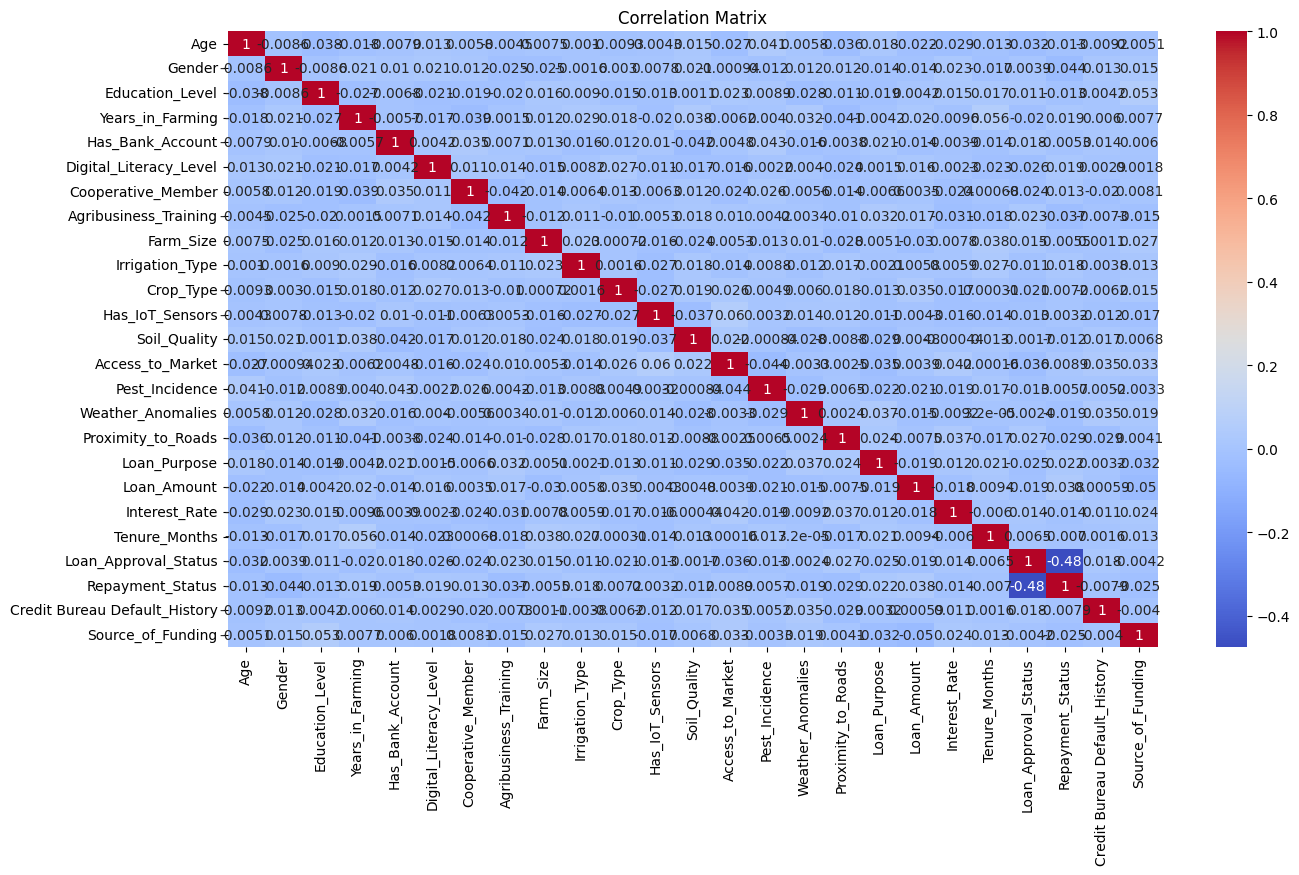

In [77]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [80]:
from feature_engine.outliers import OutlierTrimmer

trimmer = OutlierTrimmer(capping_method='iqr', tail='right',
                        variables= ['Age', 'Gender', 'Education_Level', 'Years_in_Farming',
       'Has_Bank_Account', 'Digital_Literacy_Level', 'Cooperative_Member',
       'Agribusiness_Training', 'Farm_Size', 'Irrigation_Type', 'Crop_Type',
       'Has_IoT_Sensors', 'Soil_Quality', 'Access_to_Market', 'Pest_Incidence',
       'Weather_Anomalies', 'Proximity_to_Roads', 'Loan_Purpose',
       'Loan_Amount', 'Interest_Rate', 'Tenure_Months',
       'Repayment_Status', 'Source_of_Funding'])

data_trim = trimmer.fit_transform(data)

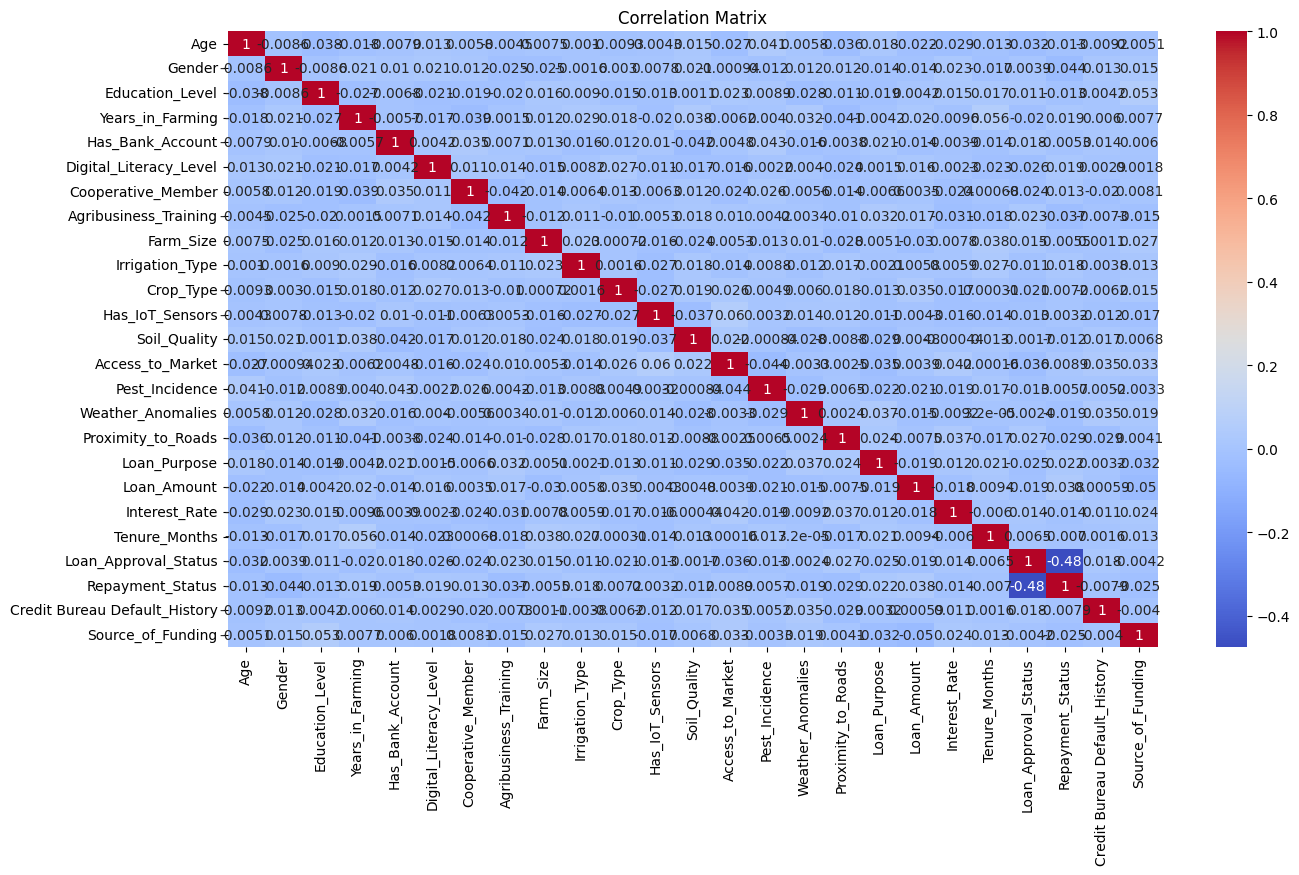

In [81]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [148]:
threshold = 0.02

correlation_matrix = data_trim.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix["Loan_Approval_Status"]) > threshold].tolist()
high_corr_features.remove("Loan_Approval_Status")
print(high_corr_features)

['Age', 'Years_in_Farming', 'Digital_Literacy_Level', 'Cooperative_Member', 'Agribusiness_Training', 'Crop_Type', 'Access_to_Market', 'Proximity_to_Roads', 'Loan_Purpose', 'Repayment_Status']


In [149]:
X_selected = data[high_corr_features]
Y = data["Loan_Approval_Status"]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2400, 10), (2400,), (600, 10), (600,))

In [151]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)


Best Logistic Regression Params: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Accuracy: 61.54%
Test Accuracy: 61.83%


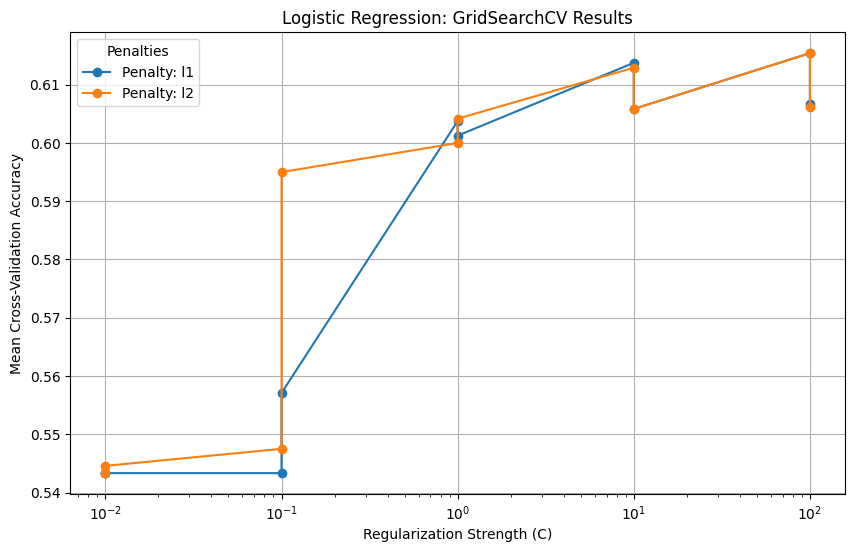

In [179]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],        # Regularization strength
    'penalty': ['l1', 'l2'],             # Type of regularization
    'solver': ['liblinear', 'saga']      # Solvers that support l1/l2
}

# Instantiate logistic regression model
lr = LogisticRegression(max_iter=1000)

# Grid search
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

# Best model and score
best_lr = grid_lr.best_estimator_
LRAcc = grid_lr.best_score_

# Display the best parameters and the best CV accuracy
print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best CV Accuracy: {:.2f}%".format(LRAcc * 100))

# Test accuracy
y_pred_lr = best_lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_lr)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Plot the grid search results for visualization
# Convert the grid search results to a DataFrame
results = grid_lr.cv_results_

# Plot the mean test scores for each combination of hyperparameters
plt.figure(figsize=(10, 6))

# Plot for C values vs. mean test score
for penalty in param_grid_lr['penalty']:
    mean_test_score = [results['mean_test_score'][i] for i in range(len(results['params'])) if results['params'][i]['penalty'] == penalty]
    C_values = [results['params'][i]['C'] for i in range(len(results['params'])) if results['params'][i]['penalty'] == penalty]
    
    plt.plot(C_values, mean_test_score, label=f'Penalty: {penalty}', marker='o')

plt.xlabel('Regularization Strength (C)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Logistic Regression: GridSearchCV Results')
plt.legend(title='Penalties')
plt.xscale('log')  # Log scale for better visualization of C values
plt.grid(True)
plt.show()

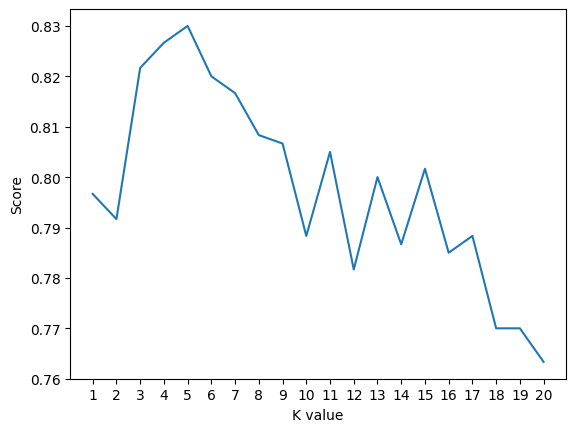

KNN best accuracy: 83.00%


In [156]:
import numpy as np

score_knn = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    score_knn.append(knn.score(X_test, y_test))
    
plt.plot(range(1,21), score_knn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(score_knn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

Best SVC Params: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Accuracy: 94.12%
Test Accuracy: 96.00%
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       413
           1       0.95      0.93      0.94       187

    accuracy                           0.96       600
   macro avg       0.96      0.95      0.95       600
weighted avg       0.96      0.96      0.96       600

[[403  10]
 [ 14 173]]


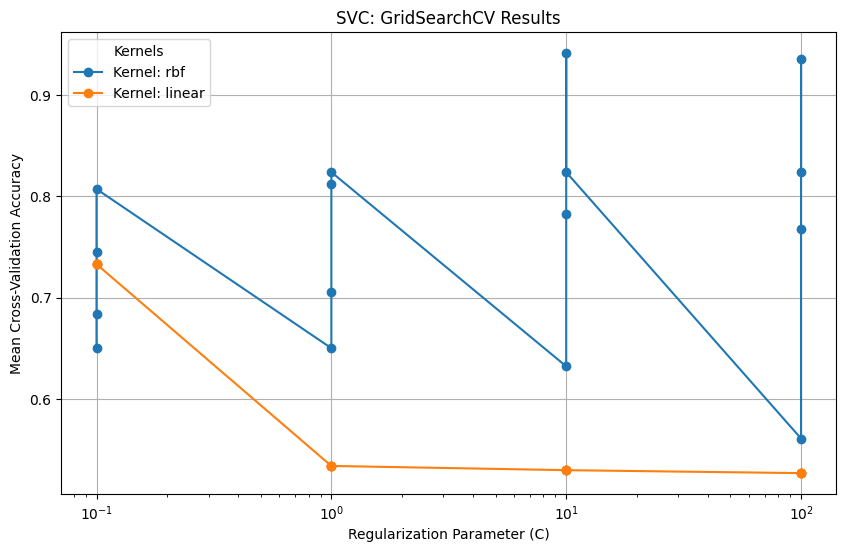

In [180]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100],             # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1],     # Kernel coefficient
    'kernel': ['rbf', 'linear']         # Kernel type: 'rbf' or 'linear'
}

# Instantiate the SVC model
svc = SVC(max_iter=500)

# Grid search for hyperparameter tuning
grid_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy')
grid_svc.fit(X_train, y_train)

# Best model and score
best_svc = grid_svc.best_estimator_
SVCAcc = grid_svc.best_score_

# Display the best parameters and accuracy
print("Best SVC Params:", grid_svc.best_params_)
print("Best CV Accuracy: {:.2f}%".format(SVCAcc * 100))

# Test accuracy
y_pred_svc = best_svc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_svc)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Classification Report and Confusion Matrix
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

# Plot the grid search results for SVC
# Convert the grid search results to a DataFrame
results = grid_svc.cv_results_

# Plot for C values vs. mean test score
plt.figure(figsize=(10, 6))

# Plot for each kernel type
for kernel_type in param_grid_svc['kernel']:
    mean_test_score = [results['mean_test_score'][i] for i in range(len(results['params'])) if results['params'][i]['kernel'] == kernel_type]
    C_values = [results['params'][i]['C'] for i in range(len(results['params'])) if results['params'][i]['kernel'] == kernel_type]
    
    plt.plot(C_values, mean_test_score, label=f'Kernel: {kernel_type}', marker='o')

plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('SVC: GridSearchCV Results')
plt.legend(title='Kernels')
plt.xscale('log')  # Log scale for better visualization of C values
plt.grid(True)
plt.show()


Best LDA Params: {'n_components': 1, 'shrinkage': 1.0, 'solver': 'lsqr'}
Best CV Accuracy: 67.96%
Test Accuracy: 68.17%
              precision    recall  f1-score   support

           0       0.70      0.93      0.80       413
           1       0.46      0.14      0.21       187

    accuracy                           0.68       600
   macro avg       0.58      0.53      0.51       600
weighted avg       0.63      0.68      0.62       600

[[383  30]
 [161  26]]


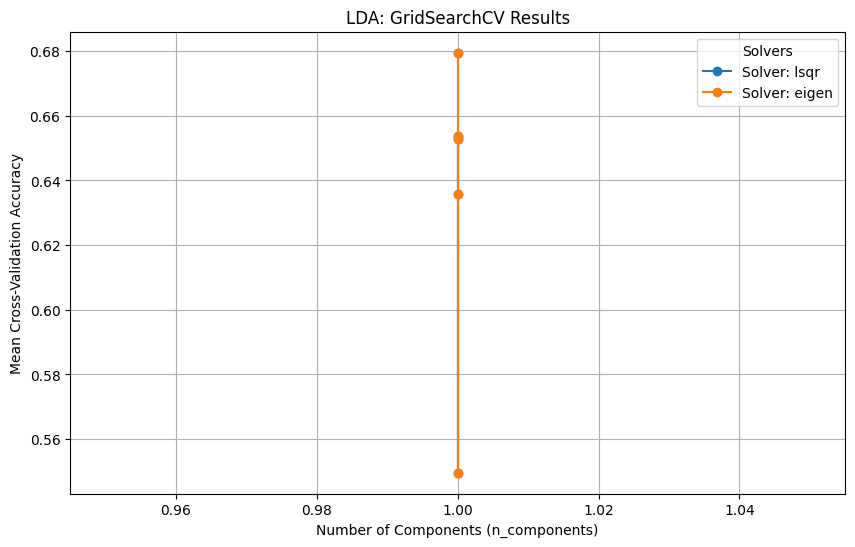

In [181]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the parameter grid for LDA
param_grid_lda = {
    'solver': ['lsqr', 'eigen'],         # Solver types: 'lsqr' (Least Squares) or 'eigen' (Eigenvalue Decomposition)
    'shrinkage': [None, 'auto', 0.1, 0.5, 1.0],  # Regularization strength, None means no shrinkage
    'n_components': [1, 2, 3]             # Number of components to use for LDA
}

# Instantiate the LDA model
lda = LinearDiscriminantAnalysis()

# Grid search for hyperparameter tuning
grid_lda = GridSearchCV(lda, param_grid_lda, cv=5, scoring='accuracy')
grid_lda.fit(X_train, y_train)

# Best model and score
best_lda = grid_lda.best_estimator_
LDAAcc = grid_lda.best_score_

# Display the best parameters and accuracy
print("Best LDA Params:", grid_lda.best_params_)
print("Best CV Accuracy: {:.2f}%".format(LDAAcc * 100))

# Test accuracy
y_pred_lda = best_lda.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_lda)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Classification Report and Confusion Matrix
print(classification_report(y_test, y_pred_lda))
print(confusion_matrix(y_test, y_pred_lda))

# Plot the grid search results for LDA
# Convert the grid search results to a DataFrame
results = grid_lda.cv_results_

# Plot for n_components values vs. mean test score
plt.figure(figsize=(10, 6))

# Plot for each solver type
for solver_type in param_grid_lda['solver']:
    mean_test_score = [results['mean_test_score'][i] for i in range(len(results['params'])) if results['params'][i]['solver'] == solver_type]
    n_components_values = [results['params'][i]['n_components'] for i in range(len(results['params'])) if results['params'][i]['solver'] == solver_type]
    
    plt.plot(n_components_values, mean_test_score, label=f'Solver: {solver_type}', marker='o')

plt.xlabel('Number of Components (n_components)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('LDA: GridSearchCV Results')
plt.legend(title='Solvers')
plt.grid(True)
plt.show()


In [183]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'LDA'],
    'Accuracy': [LRAcc * 100, KNAcc * 100, SVCAcc * 100, LDAAcc*100]
})

# Sort by accuracy in descending order
comparison = comparison.sort_values(by='Accuracy', ascending=False)

print(comparison)

                 Model   Accuracy
2                  SVM  94.125000
1          K Neighbors  83.000000
3                  LDA  67.958333
0  Logistic Regression  61.541667


In [185]:
import pickle


with open('loan_approval_model.pkl', 'wb') as f:
    pickle.dump(best_svc, f)

In [195]:
df

,Farmer_ID,First Name,Last Name,Phone Number,Age,Gender,State of Residence,Education_Level,Years_in_Farming,Has_Bank_Account,Bank Account,Bank Name,Digital_Literacy_Level,Cooperative_Member,Agribusiness_Training,Farm_ID,Farm_Location,Farm_Size,Irrigation_Type,Crop_Type,Has_IoT_Sensors,Soil_Quality,Access_to_Market,Pest_Incidence,Weather_Anomalies,Proximity_to_Roads,Finance_ID,Loan_Purpose,Loan_Amount,Interest_Rate,Tenure_Months,Loan_Approval_Status,Repayment_Status,Credit Bureau Default_History,Source_of_Funding
0,FARMER_001,Zainab,Balogun,9060227680,32,Female,Jigawa,Primary,9,True,3.385468e+09,Polaris Bank,Low,False,True,FARM_a12581,Ebonyi,3.28,Manual,Crop Farming,True,Poor,Good,Low,Rare,Close,LOAN_ce70a3,Fertilizer,177192,13.72,6,Rejected,NaN,False,Microfinance
1,FARMER_002,Ijeoma,Alabi,8180026577,21,Male,Ondo,NaN,10,True,3.071272e+09,Fidelity Bank,Medium,True,True,FARM_d78fbd,Kebbi,3.24,Manual,Mixed Farming,False,Poor,Poor,Low,Rare,Close,LOAN_209ac5,Land Expansion,279196,10.04,6,Approved,Fully Paid,True,NGO
2,FARMER_003,Femi,Ibe,8172580863,25,Female,Lagos,Tertiary,1,True,6.966750e+09,Access Bank,High,True,True,FARM_1e5531,Taraba,1.48,Sprinkler,Crop Farming,False,Poor,Good,Moderate,NaN,Far,LOAN_090d4f,Labor,255180,22.17,6,Approved,Defaulted,False,Microfinance
3,FARMER_004,Uchenna,Ibe,7062713332,33,Male,Katsina,Secondary,8,False,NaN,NaN,Low,True,True,FARM_ac9a40,Niger,1.14,Manual,Mixed Farming,False,Good,Poor,Low,Rare,Close,LOAN_cc70cd,Labor,312780,9.19,6,Rejected,NaN,False,Bank
4,FARMER_005,Bayo,Umeh,8137593586,33,Female,Akwa Ibom,NaN,1,True,5.802595e+08,First Bank,High,True,True,FARM_ce7a3d,Ebonyi,4.19,Sprinkler,Livestock Farming,False,Fair,Poor,Low,Frequent,Close,LOAN_276710,Irrigation,312943,23.14,12,Approved,Fully Paid,True,Government
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,FARMER_2996,Musa,Ibrahim,8085667902,24,Male,Borno,NaN,6,False,NaN,NaN,High,True,False,FARM_f80930,Plateau,4.00,Manual,Mixed Farming,False,Fair,Good,Moderate,NaN,Close,LOAN_bb4751,Fertilizer,417155,17.79,12,Approved,Partially Paid,True,NGO
2996,FARMER_2997,Ijeoma,Mohammed,9028513641,23,Female,Gombe,NaN,11,True,8.926865e+09,UBA,Low,False,True,FARM_e0d7f0,Ebonyi,1.24,Drip,Livestock Farming,False,Good,Poor,High,Rare,Far,LOAN_1eb6ce,Labor,403824,24.77,24,Approved,Fully Paid,False,Microfinance
2997,FARMER_2998,Ifeanyi,Nwosu,8079830893,25,Male,Ogun,NaN,13,False,NaN,NaN,Low,False,False,FARM_60c9e4,Benue,2.36,Drip,Mixed Farming,False,Fair,Good,Low,Rare,Far,LOAN_b6511d,Land Expansion,407907,11.01,24,Approved,Fully Paid,False,Microfinance
2998,FARMER_2999,Oluchi,Yusuf,8063999271,30,Female,Kebbi,Secondary,5,True,9.333106e+09,FCMB,Medium,False,True,FARM_ef7962,Ondo,2.15,Sprinkler,Mixed Farming,False,Fair,Good,High,Frequent,Far,LOAN_f9ac56,Fertilizer,181023,9.01,18,Rejected,NaN,False,NGO


In [196]:
data

,Age,Gender,Education_Level,Years_in_Farming,Has_Bank_Account,Digital_Literacy_Level,Cooperative_Member,Agribusiness_Training,Farm_Size,Irrigation_Type,Crop_Type,Has_IoT_Sensors,Soil_Quality,Access_to_Market,Pest_Incidence,Weather_Anomalies,Proximity_to_Roads,Loan_Purpose,Loan_Amount,Interest_Rate,Tenure_Months,Loan_Approval_Status,Repayment_Status,Credit Bureau Default_History,Source_of_Funding
0,32,0,1,9,1,0,0,1,3.28,1,0,1,2,0,1,2,0,1,177192,13.72,6,1,1,0,2
1,21,1,0,10,1,1,1,1,3.24,1,2,0,2,1,1,2,0,4,279196,10.04,6,0,3,1,3
2,25,0,3,1,1,2,1,1,1.48,3,0,0,2,0,2,1,1,3,255180,22.17,6,0,0,0,2
3,33,1,2,8,0,0,1,1,1.14,1,2,0,1,1,1,2,0,3,312780,9.19,6,1,1,0,0
4,33,0,0,1,1,2,1,1,4.19,3,1,0,0,1,1,0,0,2,312943,23.14,12,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,24,1,0,6,0,2,1,0,4.00,1,2,0,0,0,2,1,0,1,417155,17.79,12,0,2,1,3
2996,23,0,0,11,1,0,0,1,1.24,0,1,0,1,1,0,2,1,3,403824,24.77,24,0,3,0,2
2997,25,1,0,13,0,0,0,0,2.36,0,2,0,0,0,1,2,1,4,407907,11.01,24,0,3,0,2
2998,30,0,2,5,1,1,0,1,2.15,3,2,0,0,0,0,0,1,1,181023,9.01,18,1,1,0,3
